# Report 7: Large-scale neighbourhood search

* Radosław Winiecki, 148244
* Oskar Szudzik, 148245

Source code: https://github.com/Oskshust/evo_comp/tree/main/7

## Problem description:

In our case, a path is a Hamiltonian cycle formed by connecting 50% of the vertices that appear on a plane. The best path is the one for which the cost of taking it is the lowest.   

The aim of the problem is to implement two versions of Large-scale neighbourhood search (with the steepest LS used in a loop and without) and compare it to ILS and MSLS.

## LNS pseudocode

```
function lns(matrix, finish_time, with_ls):
    x, cost = steepest(matrix, random_solution(matrix))
        
    best_solution, best_cost = x, cost
    
    while time.time() < finish_time:
        x = destroy(x)
        x = repair(x)
        
        if with_ls:
            y, y_cost = steepest(matrix, x)
            if y_cost < best_cost:
                best_solution, best_cost = y, y_cost
                x = y
        else:
            x_cost = calculate_cost(x, matrix)
            if x_cost < best_cost:
                best_solution, best_cost = x, x_cost

    return best_solution, best_cost
```

Destroy operator

```
def destroy(solution):
    # 20-30% length of the solution
    subpath_length = np.random.randint(20, 31)
    
    start_index = np.random.randint(0, len(solution))
    
    for i in range(start_index, start_index + subpath_length):
        solution[i%len(solution)] = -1
    
    return solution
```

Repair operator

```
# weighted regret heuristic with weight =  0.5
def repair(matrix, destroyed_solution):
    cycle = [vertex for vertex in destroyed_solution if vertex != -1]
    
    current_cost = calculate_cost(cycle, matrix)

    unvisited = [all_nodes - cycle]

    while np.any(unvisited):
        scores = -np.ones(shape=unvisited.shape) * np.inf
        new_deltas = np.zeros(shape=unvisited.shape)
        new_sols = np.zeros(shape=unvisited.shape, dtype=np.ndarray)

        for vertex_id in np.where(unvisited == True)[0]:
            regret, solution, delta = find_regret_with_solution(cycle, vertex_id, matrix)

            score = 0.5 * regret - 0.5 * delta
            scores[vertex_id] = score
            new_sols[vertex_id] = solution
            new_deltas[vertex_id] = delta

        highest_score_id = np.argmax(scores)
        cycle = new_sols[highest_score_id]
        unvisited[highest_score_id] = False
        current_cost += new_deltas[highest_score_id]

    return cycle, current_cost
```

Average time per iteration: 1.7905488109250438 s
Average iterations: 806.5
Results: 78267.65(76761 - 79963)
Best solution: [0, 1, 4, 6, 8, 11, 15, 19, 20, 21, 22, 24, 25, 26, 27, 31, 32, 36, 37, 40, 41, 43, 48, 50, 51, 53, 55, 59, 61, 62, 64, 66, 69, 71, 72, 74, 75, 76, 77, 79, 80, 81, 85, 87, 88, 91, 92, 94, 95, 96, 98, 101, 102, 106, 108, 109, 112, 113, 114, 117, 119, 121, 126, 127, 128, 130, 132, 135, 137, 141, 143, 144, 147, 149, 152, 153, 154, 159, 160, 161, 163, 164, 167, 169, 171, 174, 175, 177, 178, 180, 181, 183, 185, 186, 189, 192, 194, 195, 196, 199]


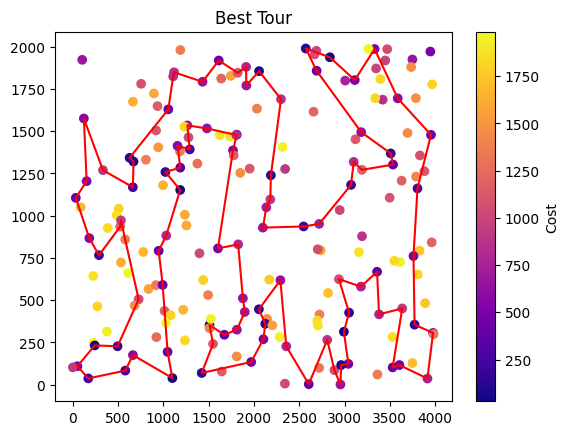

In [ ]:
run_lns(a)

Average time per iteration: 1.5359118057679193 s
Average iterations: 939.4
Results: 71671.3(69239 - 75228)
Best solution: [0, 2, 4, 8, 12, 13, 16, 18, 19, 21, 24, 25, 29, 31, 33, 34, 36, 37, 38, 44, 47, 50, 51, 52, 53, 55, 57, 58, 59, 61, 63, 64, 66, 67, 70, 71, 72, 73, 79, 80, 82, 87, 88, 89, 91, 95, 99, 101, 103, 107, 109, 114, 115, 117, 119, 121, 122, 127, 129, 130, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 147, 148, 150, 153, 154, 157, 158, 159, 162, 163, 165, 166, 169, 170, 172, 174, 179, 181, 182, 183, 185, 189, 190, 192, 193, 196, 197, 198]


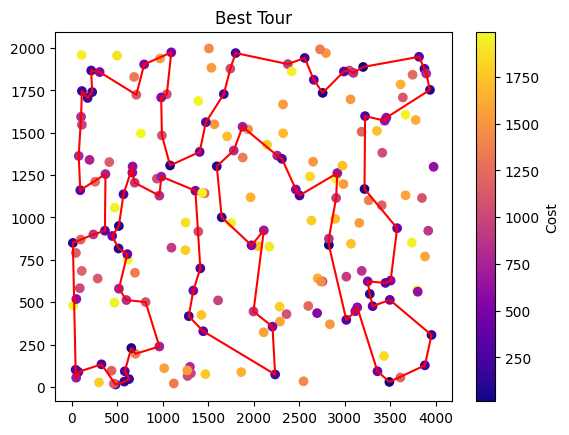

In [ ]:
run_lns(b)

Average time per iteration: 1.5213040345814592 s
Average iterations: 948.45
Results: 51772.05(49396 - 53718)
Best solution: [0, 1, 2, 4, 6, 11, 12, 15, 18, 19, 20, 21, 22, 24, 26, 27, 28, 31, 32, 36, 40, 41, 43, 45, 48, 50, 51, 53, 55, 59, 62, 64, 66, 69, 71, 72, 73, 74, 75, 77, 79, 81, 87, 88, 89, 91, 92, 94, 95, 96, 98, 101, 106, 108, 109, 112, 113, 114, 117, 119, 121, 126, 128, 130, 132, 134, 135, 138, 141, 143, 144, 147, 149, 150, 152, 153, 154, 155, 156, 157, 159, 160, 163, 164, 167, 169, 170, 171, 175, 177, 178, 180, 185, 186, 189, 190, 192, 194, 195, 199]


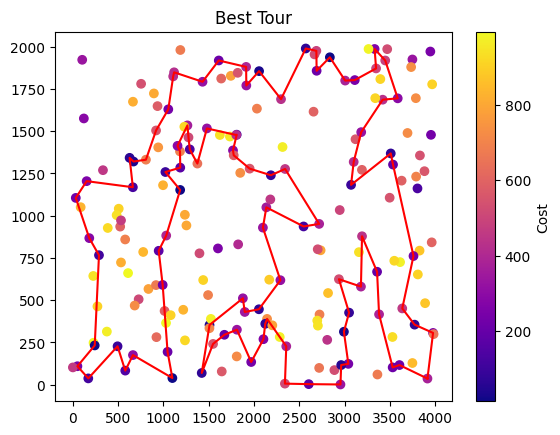

In [ ]:
run_lns(c)

Average time per iteration: 1.419851841225427 s
Average iterations: 1015.8
Results: 48516.45(46058 - 50472)
Best solution: [0, 3, 4, 8, 12, 18, 19, 24, 25, 26, 29, 31, 33, 34, 36, 37, 44, 50, 51, 52, 55, 57, 58, 59, 61, 63, 64, 66, 67, 69, 71, 72, 73, 80, 82, 84, 85, 88, 89, 91, 92, 95, 97, 99, 101, 107, 114, 115, 117, 119, 120, 121, 122, 127, 129, 130, 132, 134, 135, 136, 137, 139, 140, 141, 142, 143, 145, 146, 147, 148, 150, 153, 154, 156, 157, 158, 159, 161, 162, 163, 165, 166, 169, 171, 172, 174, 179, 181, 182, 183, 185, 187, 188, 189, 190, 192, 193, 196, 197, 198]


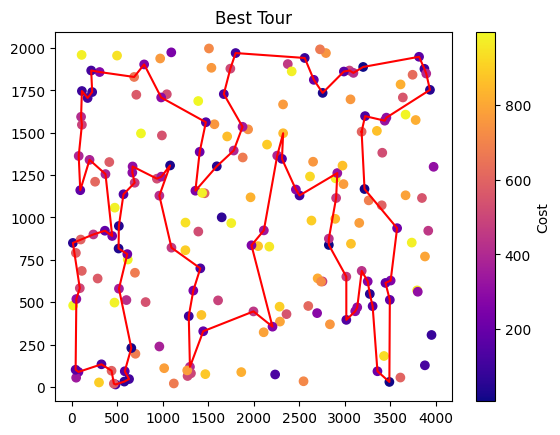

In [ ]:
run_lns(d)

### Second LNS - without LS

Average time per iteration: 0.3303810338329852 s
Average iterations: 4359.65
Results: 78290.5(76676 - 80016)
Best solution: [0, 1, 4, 5, 6, 8, 11, 14, 15, 19, 20, 21, 22, 26, 27, 31, 32, 34, 36, 40, 43, 48, 50, 51, 53, 55, 59, 61, 62, 64, 66, 71, 72, 74, 75, 76, 77, 79, 80, 81, 88, 91, 92, 94, 95, 96, 98, 99, 101, 106, 108, 109, 111, 112, 113, 114, 116, 117, 119, 121, 124, 126, 127, 128, 130, 132, 134, 135, 141, 143, 145, 147, 149, 150, 152, 153, 154, 159, 160, 161, 163, 164, 167, 169, 171, 175, 177, 178, 180, 181, 183, 185, 186, 189, 190, 192, 194, 195, 198, 199]


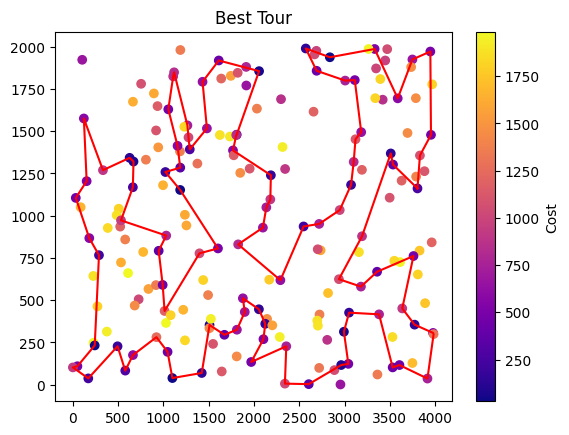

In [ ]:
run_lns(a, with_ls=False)

Average time per iteration: 0.342561826561319 s
Average iterations: 4204.75
Results: 71229.05(69547 - 74454)
Best solution: [0, 2, 5, 8, 12, 14, 16, 18, 19, 21, 24, 25, 31, 33, 34, 36, 37, 38, 40, 42, 44, 50, 51, 52, 53, 55, 57, 58, 59, 63, 64, 66, 67, 69, 70, 71, 72, 73, 79, 80, 82, 84, 88, 89, 91, 92, 95, 99, 101, 102, 103, 107, 112, 113, 114, 115, 117, 119, 121, 122, 127, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 142, 143, 145, 147, 148, 150, 153, 154, 156, 157, 158, 159, 162, 165, 169, 170, 172, 174, 179, 181, 182, 183, 185, 190, 192, 196, 197, 198]


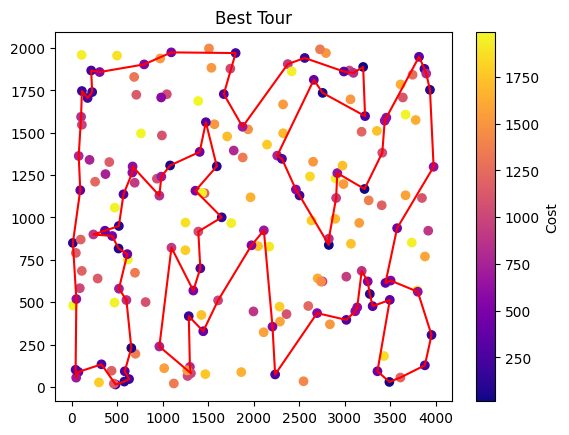

In [ ]:
run_lns(b, with_ls=False)

Average time per iteration: 0.33043236909007273 s
Average iterations: 4358.9
Results: 51617.35(50364 - 53947)
Best solution: [0, 1, 2, 4, 6, 8, 11, 12, 15, 18, 19, 20, 21, 22, 26, 31, 32, 40, 41, 42, 43, 45, 48, 49, 50, 51, 53, 55, 59, 61, 62, 64, 66, 69, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 87, 88, 89, 91, 92, 93, 94, 95, 96, 98, 101, 102, 108, 109, 110, 112, 113, 114, 117, 119, 121, 124, 128, 133, 135, 139, 141, 143, 144, 145, 149, 152, 153, 154, 155, 156, 157, 159, 163, 164, 167, 169, 171, 175, 177, 178, 180, 185, 186, 189, 190, 192, 194, 195, 196, 199]


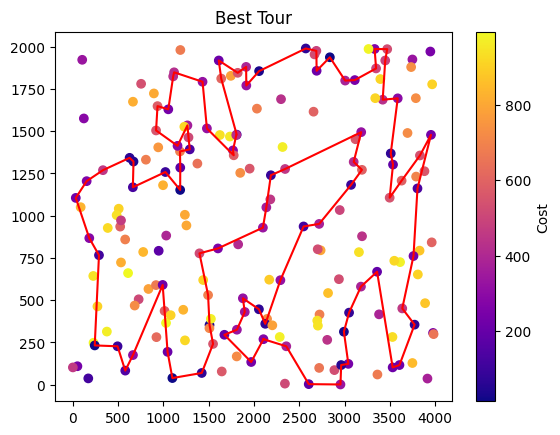

In [ ]:
run_lns(c, with_ls=False)

Average time per iteration: 0.3428489384180321 s
Average iterations: 4200.9
Results: 48117.5(45769 - 51529)
Best solution: [2, 4, 5, 8, 12, 14, 16, 18, 19, 24, 25, 29, 31, 33, 34, 36, 37, 38, 44, 47, 50, 51, 52, 53, 55, 57, 59, 61, 63, 64, 65, 66, 67, 69, 70, 71, 73, 80, 82, 88, 89, 91, 94, 97, 99, 101, 103, 107, 112, 114, 115, 117, 119, 121, 122, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 142, 143, 145, 147, 148, 150, 153, 154, 156, 157, 158, 159, 162, 165, 166, 169, 170, 172, 174, 179, 181, 182, 183, 185, 187, 189, 190, 193, 196, 197, 198]


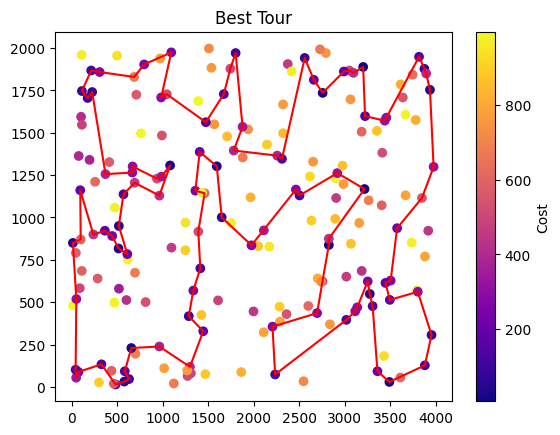

In [ ]:
run_lns(d, with_ls=False)

### Objective function values:

| Algorithm | Instance A  | Instance B   | Instance C   | Instance D   |
|-----------|----------|----------|----------|----------|
| MLSL (baseline) | 75093.15(74399 - 75615) | 68222.2(67457 - 68718) |  49098.0(48636 - 49552) | 45526.9(45068 - 46057) |
| ILS | 73835.35(73526 - 74142) | 67134.0(66761 - 67455) | 48226.4(47776 - 49000) | 44217.2(43837 - 44909) |
| LNS | 78267.65(76761 - 79963) | 71671.3(69239 - 75228) | 51772.05(49396 - 53718) | 48516.45(46058 - 50472) |
| LNS_without_LS | 78290.5(76676 - 80016) | 71229.05(69547 - 74454) | 51617.35(50364 - 53947) | 48117.5(45769 - 51529) |


### Average time per instance values (in seconds):

| Methods | Instance A | Instance B | Instance C | Instance D |
|-----------|----------|----------|----------|----------|
| baseline | 7.146 | 7.249 | 7.368 | 7.092 |
| ILS | 1.680 | 1.741 | 1.746 | 1.761 |
| LNS | 1.790 | 1.535 | 1.521 | 1.419 |
| LNS_without_LS | 0.330 | 0.342 | 0.330 | 0.342 |

### Average number of iterations per run for ILS:

| Methods | Instance A | Instance B | Instance C | Instance D |
|-----------|----------|----------|----------|----------|
| ILS | 860.0 | 830.0 | 826.2 | 820.8 |
| LNS | 806.5 | 939.4 | 948.45 | 1015.8 |
| LNS_without_LS | 4359.65 | 4204.75 | 4358.9 | 4200.9 |

### Conclusions:

1. LNS with LS seems as fast as ILS however - gives worse results.
2. LNS without LS is much quicker and performs significantly more operations. However, its performance is similar to LNS with LS.
3. It might be a case of smaller changes - in LNS we use 20-30% change of the solution whereas in the ILS we used 50% change of the solution (averaged - starting and finishing index were chosen randomly).